In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_data = pd.merge(ride_data, city_data, how='left', on='city')
# Display the data table for preview
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

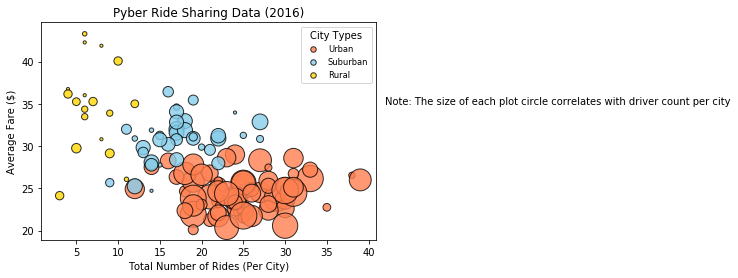

In [2]:
# Obtain the x and y coordinates for each of the three city types
urbancities = combined_data[combined_data["type"] == "Urban"]
suburbancities = combined_data[combined_data["type"] == "Suburban"]
ruralcities = combined_data[combined_data["type"] == "Rural"]
#Urban City Data Calcs
urbancounts_ride = urbancities.groupby(["city"]).count()["ride_id"]
urbanavg_fare = urbancities.groupby(["city"]).mean()["fare"]
urbancounts_driver = urbancities.groupby(["city"]).mean()["driver_count"]
#Suburban City Data Calcs
suburbancounts_ride = suburbancities.groupby(["city"]).count()["ride_id"]
suburbanavg_fare = suburbancities.groupby(["city"]).mean()["fare"]
suburbancounts_driver = suburbancities.groupby(["city"]).mean()["driver_count"]
#Rural City Data Calcs
ruralcounts_ride = ruralcities.groupby(["city"]).count()["ride_id"]
ruralavg_fare = ruralcities.groupby(["city"]).mean()["fare"]
ruralcounts_driver = ruralcities.groupby(["city"]).mean()["driver_count"]



# Build the scatter plots for each city types
#Urban Scat Plot
plt.scatter(urbancounts_ride, urbanavg_fare, s=10*urbancounts_driver, c="coral", 
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Urban")
#Suburban Scat Plot
plt.scatter(suburbancounts_ride, suburbanavg_fare, s=10*suburbancounts_driver, c="skyblue", 
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Suburban")
#Rural Scat Plot
plt.scatter(ruralcounts_ride, ruralavg_fare, s=10*ruralcounts_driver, c="gold", 
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Rural")
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
# Create a legend
legend = plt.legend(fontsize="small", mode="Expanded", numpoints=1, scatterpoints=1, loc="best", title="City Types", labelspacing=0.5)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
plt.text(42, 35, "Note: The size of each plot circle correlates with driver count per city")
# Save Figure
plt.savefig("PyberScatPlotHW.png")

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

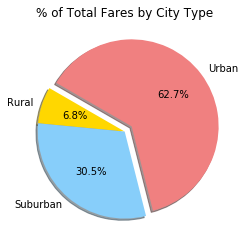

In [4]:
# Calculate Type Percents
typepercents = 100 * combined_data.groupby(["type"]).sum()["fare"] / combined_data["fare"].sum()
# Build Pie Chart
plt.pie(typepercents, labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"], explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("PybersPieHWFig1.png")

In [5]:
# Show Figure
plt.show()

## Total Rides by City Type

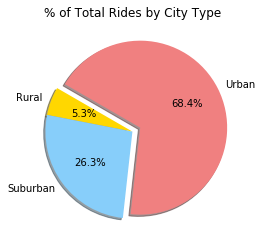

In [6]:
# Calculate Ride Percents
ridepercents = 100 * combined_data.groupby(["type"]).count()["ride_id"] / combined_data["ride_id"].count()
# Build Pie Chart
plt.pie(ridepercents, labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"], explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("PyberPieHWFig2.png")

In [7]:
# Show Figure
plt.show()

## Total Drivers by City Type

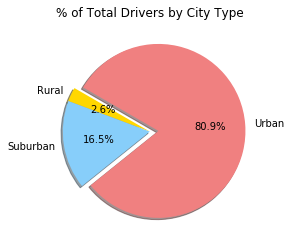

In [8]:
# Calculate Driver Percents
driverpercents = 100 * city_data.groupby(["type"]).sum()["driver_count"] / city_data["driver_count"].sum()
# Build Pie Charts
plt.pie(driverpercents, labels=["Rural", "Suburban", "Urban"], colors=["gold", "lightskyblue", "lightcoral"], explode=[0, 0, 0.1], autopct='%1.1f%%', shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("PyberPieHWFig3.png")

In [9]:
# Show Figure
plt.show()